# Hierarchical Clustering of the industry portfolios data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing


In [2]:
data=pd.read_csv("48_Industry_Portfolios_Daily.csv", index_col=0, parse_dates=True)
data.index = pd.to_datetime(data.index)

C:\Users\ernac\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,11,15,20,26,27,33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
1926-07-01,0.56,-0.07,NaN,-1.39,0.00,-1.44,0.62,-1.27,-0.90,0.12,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
1926-07-02,0.29,0.06,NaN,0.78,0.70,1.46,0.03,0.00,-0.34,-0.35,...,1.07,0.06,0.00,0.01,-0.10,1.04,-0.03,-0.61,-0.45,3.09
1926-07-06,-0.33,0.18,NaN,-1.74,0.50,-0.96,-0.06,4.27,-1.20,0.41,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
1926-07-07,3.57,-0.15,NaN,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,0.16,...,2.22,0.18,-3.21,-0.57,-0.70,-1.09,0.21,0.07,-0.40,0.62
1926-07-08,0.30,1.12,NaN,-0.15,0.30,-0.49,0.24,0.00,-0.01,0.79,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98


In [4]:
#We drop all missing entries from our dataset 
data=data.astype("float")
data=data.dropna(how='any')    

In [5]:
col_number=len(data.columns)
T=len(data.index)

In [6]:
# Normalise data

scaler = preprocessing.StandardScaler().fit(data)
data =pd.DataFrame(scaler.transform(data),index=data.index,columns=data.columns)

In [7]:
len(data)

12196

In [8]:
#data.transpose().to_csv('dataT.csv',index=True)

## Exploratory analysis


In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation



In [10]:
#the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances, which in our case is pretty close:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


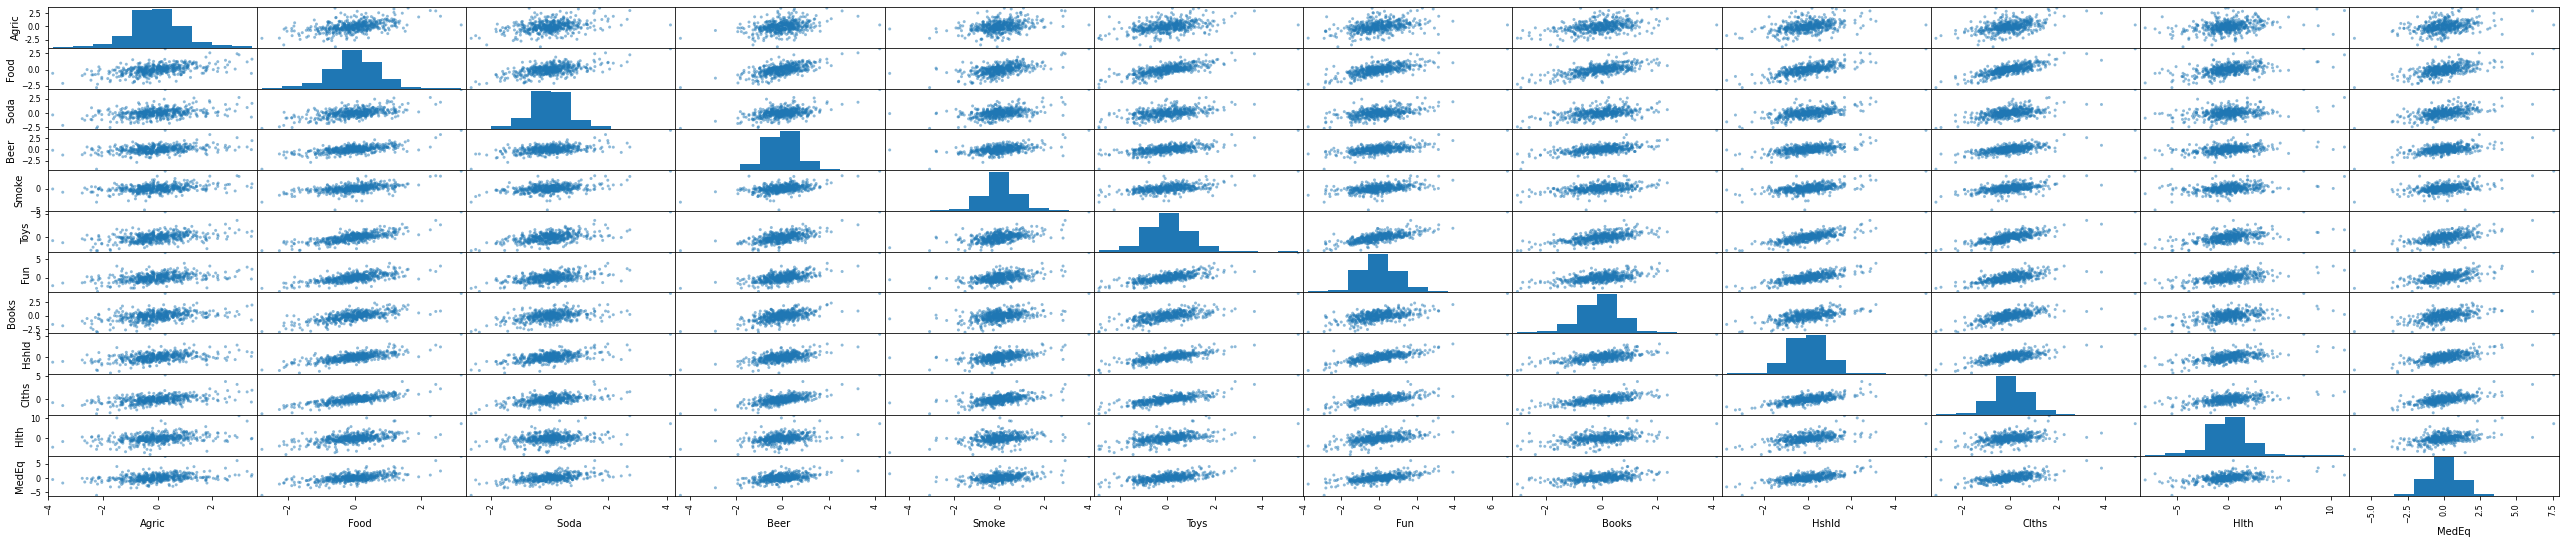

In [11]:
#Identifying relationships between industry indexes
fig1=pd.plotting.scatter_matrix(data.iloc[:500,:12],figsize=(45,9))
plt.show()

## Cophenetic correlation to identify best linkage

In [14]:

from sklearn.cluster import AgglomerativeClustering 
import matplotlib.pyplot as plt
# Hierarchical Agglomerative Clustering
h1=linkage(my_metric,method = 'centroid')

h2=linkage(my_metric,method = 'complete')
h3=linkage(my_metric,method = 'average')
h4=linkage(my_metric,method = 'single')


# Cophenetic Distances, for each linkage
c1 = cophenet(h1, pdist(data.transpose()))
c2 = cophenet(h2, pdist(data.transpose()))
c3 = cophenet(h3, pdist(data.transpose()))
c4 = cophenet(h4, pdist(data.transpose()))

c1[0],c2[0],c3[0],c4[0]

(0.7931591859912546,
 0.7573598223663426,
 0.7952306537635528,
 0.8156202286357287)

## Hierarchical clustering

In [15]:
corr= data.corr(method="spearman")
#my_metric=(2*(1-corr))**0.5
my_metric=abs(corr)

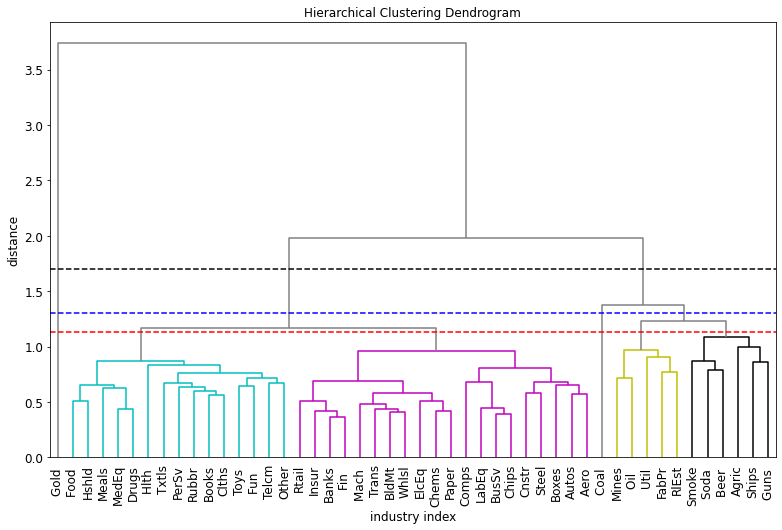

In [16]:
# Here we use spearman correlation
#!pip install hcluster
from scipy import stats
import matplotlib as mpl

from scipy.cluster import hierarchy
from matplotlib.pyplot import cm

cmap = cm.rainbow(np.linspace(0, 1, 10))


# Do the clustering    
Z =linkage(my_metric,  method='complete')
hierarchy.set_link_color_palette(['c', 'm', 'y', 'k'])

# Plot dendogram

plt.figure(figsize=(13, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('industry index',fontsize=12)
plt.ylabel('distance',fontsize=12)
dendrogram(
    Z,
    labels=data.transpose().index,
     color_threshold=1.13, above_threshold_color='grey'

)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(y=1.13, c='red', lw=1.5, linestyle='dashed')

plt.axhline(y=1.3, c='blue', lw=1.5, linestyle='dashed')
plt.axhline(y=1.7, c='black', lw=1.5, linestyle='dashed')

plt.show()

## Selecting a Distance Cut-Off aka Determining the Number of Clusters


<AxesSubplot:>

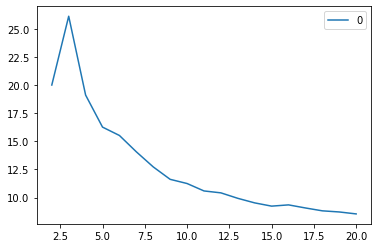

In [17]:
from sklearn import metrics

m1_comp=[]

for i in range(2,21):
    agg_comp=AgglomerativeClustering(linkage ='complete', n_clusters=i)
    as_comp = agg_comp.fit_predict(my_metric)
    labels_comp=agg_comp.labels_
    m1=metrics.calinski_harabasz_score(my_metric, labels_comp)
    m1_comp.append(m1)
m1_comp=pd.DataFrame(m1_comp,index=range(2,21))
sns.lineplot(data=m1_comp)

# Label assignment

In [18]:
## Retrieving the clusters
from scipy.cluster.hierarchy import fcluster
max_d = 1.13
clusters_id = fcluster(Z, max_d, criterion='distance')
clusters_id


array([4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2,
       2, 2, 4, 4, 6, 3, 5, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 3, 2, 1], dtype=int32)

In [19]:
data=data.transpose()

In [20]:
##Add the cluster membership to first dataframe x
data['cluster_id'] = clusters_id[:]
## Sort the countries in x by cluster membership
data_cluster_sort = data.sort_values('cluster_id')
#del y_cluster_sort['clusters_id'] 

In [21]:
data['cluster_id'].unique()

array([4, 1, 2, 3, 6, 5], dtype=int32)

In [22]:
#https://aggieanil.wordpress.com/2017/08/23/machine-learning-ii-unsupervised-machine-learning-clustering-and-principal-component-analysis/
## separate countries  based on cluster membership
c1 = data_cluster_sort.loc[data_cluster_sort["cluster_id"] == 1].index
c2 = data_cluster_sort.loc[data_cluster_sort["cluster_id"] == 2].index
c3 = data_cluster_sort.loc[data_cluster_sort["cluster_id"] == 3].index
c4 = data_cluster_sort.loc[data_cluster_sort["cluster_id"] == 4].index
c5 = data_cluster_sort.loc[data_cluster_sort["cluster_id"] == 5].index
c6 = data_cluster_sort.loc[data_cluster_sort["cluster_id"] == 6].index
c1,c2,c3,c4,c5,c6


(Index(['Other', 'Txtls', 'Rubbr', 'PerSv', 'MedEq', 'Hlth ', 'Clths', 'Hshld',
        'Drugs', 'Fun  ', 'Books', 'Food ', 'Telcm', 'Meals', 'Toys '],
       dtype='object'),
 Index(['Rtail', 'Insur', 'Whlsl', 'Boxes', 'Paper', 'LabEq', 'Chips', 'Comps',
        'BusSv', 'Banks', 'Trans', 'Aero ', 'Chems', 'BldMt', 'Cnstr', 'Steel',
        'Fin  ', 'Autos', 'ElcEq', 'Mach '],
       dtype='object'),
 Index(['Mines', 'RlEst', 'FabPr', 'Util ', 'Oil  '], dtype='object'),
 Index(['Ships', 'Guns ', 'Smoke', 'Beer ', 'Soda ', 'Agric'], dtype='object'),
 Index(['Coal '], dtype='object'),
 Index(['Gold '], dtype='object'))

In [23]:
data_clusters=data

## PCA

In [24]:
data=pd.read_csv("48_Industry_Portfolios_Daily.csv", index_col=0, parse_dates=True)
data.index = pd.to_datetime(data.index)
data=data.astype("float")
data=data.dropna(how='any')    
data2=data.transpose()

C:\Users\ernac\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,11,15,20,26,27,33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(data2)


PCA(random_state=42)

In [26]:
pca.explained_variance_ratio_

array([0.14054, 0.11138, 0.0668 , 0.053  , 0.03708, 0.03521, 0.03118,
       0.02813, 0.02684, 0.0258 , 0.02483, 0.02439, 0.02228, 0.02201,
       0.02136, 0.01888, 0.01825, 0.0177 , 0.01651, 0.01631, 0.01518,
       0.01447, 0.01365, 0.01344, 0.01297, 0.01218, 0.01186, 0.01109,
       0.01088, 0.01065, 0.0099 , 0.00949, 0.00921, 0.00872, 0.00798,
       0.00733, 0.00706, 0.00677, 0.00658, 0.00607, 0.00603, 0.00538,
       0.00534, 0.00509, 0.0049 , 0.00486, 0.00447, 0.     ])

In [27]:
principal_comp=pd.DataFrame(pca.components_,index=data2.index)


In [28]:
df_PC=pd.concat([principal_comp.iloc[:,:2],data_clusters["cluster_id"]],axis=1)
df_PC.columns=["PC1","PC2",'cluster_id']


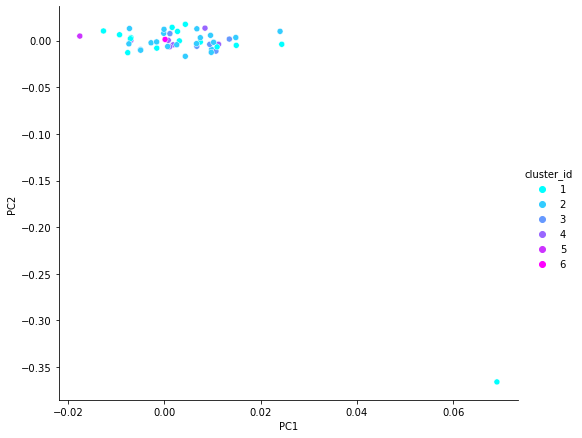

In [29]:
figsize=(16,9)
sns.relplot(data=df_PC, x='PC1', y='PC2', kind='scatter',
            height=6, aspect=1.2, hue='cluster_id', palette='cool')

## Cluster Stability

In [30]:
data=data.transpose()

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.utils import resample
jaccard_sim1=[]
jaccard_sim2=[]
jaccard_sim3=[]
jaccard_sim4=[]
jaccard_sim5=[]
jaccard_sim6=[]

for i in range(1000):
    boot = resample(data, replace=True, n_samples=48)
    boot=boot.transpose()
    corr2= boot.corr(method="spearman")
    my_metric2=abs(corr2)
    Z1 =linkage(my_metric2, method='complete')
    clusters_temp = fcluster(Z1, max_d, criterion='distance')
    data['cluster_id2'] = clusters_temp[:]
    data_cluster_sort2 = data.sort_values('cluster_id2')

    C1 = data_cluster_sort2.loc[data_cluster_sort2["cluster_id2"] == 1].index
    C2 = data_cluster_sort2.loc[data_cluster_sort2["cluster_id2"] == 2].index
    C3 = data_cluster_sort2.loc[data_cluster_sort2["cluster_id2"] == 3].index
    C4 = data_cluster_sort2.loc[data_cluster_sort2["cluster_id2"] == 4].index
    C5 = data_cluster_sort2.loc[data_cluster_sort2["cluster_id2"] == 5].index
    C6 = data_cluster_sort2.loc[data_cluster_sort2["cluster_id2"] == 6].index
    
    
    jac_sim1 = np.intersect1d(c1.append(c2), C1.append(C2)).size / np.union1d(c1.append(c2), C1.append(C2)).size
    jac_sim2=np.intersect1d(c2.append([c1,c3]), C2.append([C1,C3])).size / np.union1d(c2.append([c1,c3]), C2.append([C1,C3])).size
    jac_sim3=np.intersect1d(c3.append([c2,c4]), C3.append([C2,C4])).size / np.union1d(c3.append([c2,c4]), C3.append([C2,C4])).size
    jac_sim4=np.intersect1d(c4.append([c3,c5]), C4.append([C3,C5])).size / np.union1d(c4.append([c3,c5]), C4.append([C3,C5])).size
    jac_sim5=np.intersect1d(c5.append([c4,c6]), C5.append([C4,C6])).size / np.union1d(c5.append([c4,c6]), C5.append([C4,C6])).size
    jac_sim6=np.intersect1d(c6.append(c5), C6.append(C5)).size / np.union1d(c6.append(c5), C6.append(C5)).size

    jaccard_sim1.append(jac_sim1)
    jaccard_sim2.append(jac_sim2)
    jaccard_sim3.append(jac_sim3)
    jaccard_sim4.append(jac_sim4)
    jaccard_sim5.append(jac_sim5)
    jaccard_sim6.append(jac_sim6)

In [346]:
df_jac = pd.DataFrame({"Cluster 1":jaccard_sim1,"Cluster 2":jaccard_sim2,"Cluster 3":jaccard_sim3,"Cluster 4": jaccard_sim4,
                      "Cluster 5": jaccard_sim5,"Cluster 6": jaccard_sim6})
df_jac.to_excel("Jaccardscore.xlsx",
             sheet_name='Sheet_name_1') 

In [218]:
import itertools 

def jaccard(labels1, labels2):
    """
    Computes the Jaccard similarity between two sets of clustering labels.
    The value returned is between 0 and 1, inclusively. A value of 1 indicates
    perfect agreement between two clustering algorithms, whereas a value of 0
    indicates no agreement. For details on the Jaccard index, see:
    http://en.wikipedia.org/wiki/Jaccard_index
    Example:
    labels1 = [1, 2, 2, 3]
    labels2 = [3, 4, 4, 4]
    print jaccard(labels1, labels2)
    @param labels1 iterable of cluster labels
    @param labels2 iterable of cluster labels
    @return the Jaccard similarity value
    """
    n11 = n10 = n01 = 0
    n = len(labels1)
    # TODO: Throw exception if len(labels1) != len(labels2)
    for i, j in itertools.combinations(range(n), 2):
        comembership1 = labels1[i] == labels1[j]
        comembership2 = labels2[i] == labels2[j]
        if comembership1 and comembership2:
            n11 += 1
        elif comembership1 and not comembership2:
            n10 += 1
        elif not comembership1 and comembership2:
            n01 += 1
    return float(n11) / (n11 + n10 + n01) 

In [225]:
values_sim=[]

for i in range(200):
    boot = resample(data, replace=True, n_samples=48)
    boot=boot.transpose()
    corr2= boot.corr(method="spearman")
    my_metric2=abs(corr2)

    Z1 =linkage(my_metric2, method='complete')
    clusters_temp = fcluster(Z1, max_d, criterion='distance')
    data['cluster_id2'] = clusters_temp[:]

    clusters_id = fcluster(Z, max_d, criterion='distance')
    data['cluster_id'] = clusters_id[:]

    values_sim.append(jaccard(data['cluster_id'],data['cluster_id2']))

In [226]:
np.mean(values_sim)

0.17028121847961672